In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pearc19_model import pop_dyn
from scipy.signal import find_peaks

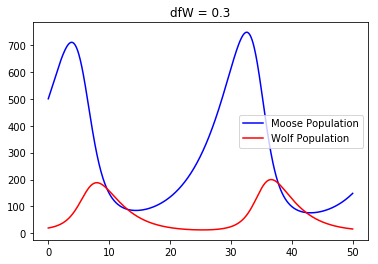

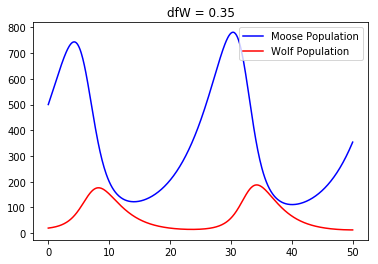

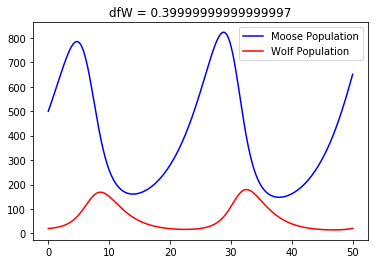

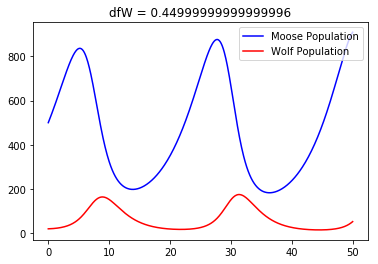

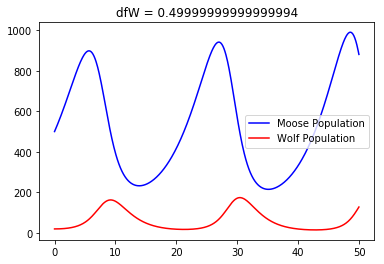

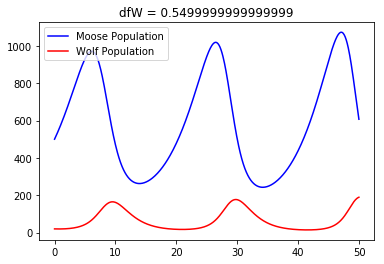

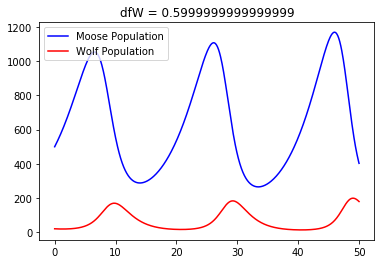

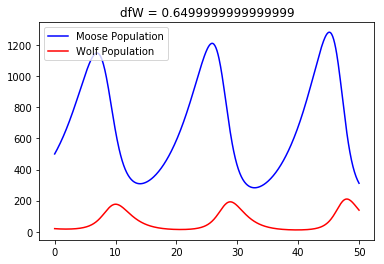

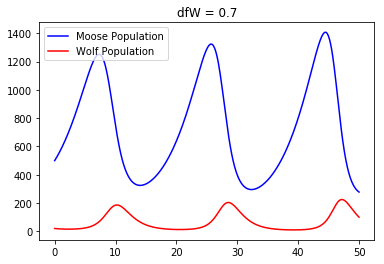

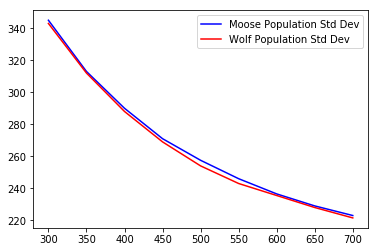

In [2]:
dfW_vec = np.arange(0.3, 0.71, 0.05)
M_amp = np.zeros(dfW_vec.size)
W_amp = np.zeros(dfW_vec.size)
M_per = np.zeros(dfW_vec.size)
W_per = np.zeros(dfW_vec.size)
brW = 0.001

for i, dfW_var in enumerate(dfW_vec):
    t,M,W = pop_dyn(dfW = dfW_var)
    
    M_peaks, _ = find_peaks(M) 
    W_peaks, _ = find_peaks(W)
    
    M_amp[i] = np.amax(M) - np.amin(M)
    W_amp[i] = np.amax(W) - np.amin(W)
    
    M_per[i] = np.mean(M_peaks[1:] - M_peaks[:-1])
    W_per[i] = np.mean(W_peaks[1:] - W_peaks[:-1])
    
    
    plt.figure()
    plt.title('dfW = '+ str(dfW_var))
    # Plot the moose population
    plt.plot(t, M, color = "b", label = "Moose Population")
    plt.plot(t, W, color = "r", label = "Wolf Population")
    
    plt.legend()
    plt.show()
    
plt.figure()
plt.plot(dfW_vec/brW, M_per, color = "b", label = "Moose Population Std Dev" )
plt.plot(dfW_vec/brW, W_per, color = "r", label = "Wolf Population Std Dev")
plt.legend()
plt.show()
